# Advertising sales price prediction

In [1]:
# libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data 
df = pd.read_csv(r"D:\ALL Projects\1ML\Advertising_sales_price\Ads_prices.csv")
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# see all info about data
df.info()
## Here all columns are numerical  // no need to convert them 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB



## Data cleaning


In [4]:
## Heres a column named Unnamed: 0 /// not needed
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
## drop the unnamed column
df.drop(columns=["Unnamed: 0"], inplace=True)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Explore the data


1.....Normal distribution  \
Most values cluster around the mean.
Example: human height, temperature, exam scores.
                                                

         *
       * * *
     *       *
   *           *
 *               *
---------------------------

Properties:

Symmetrical

Mean = Median = Mode

Few outliers

🔹 ML Algorithms that work best:

✅ Linear models: Linear Regression, Logistic Regression
✅ SVM with linear kernel
✅ KNN (if standardized)
✅ Naive Bayes (assumes normality for continuous features)


2.....Right-Skewed (Positively Skewed)
Long tail on the right side → a few very large values.
Example: income, sales, property prices.

* 
* *
*  *
*   *
*    *   *   *   *
---------------------------

Properties:

Mean > Median

Most values are small, few are large

🔹 ML Tips:

Transform data (e.g., log(x), sqrt(x)) to make it more normal

Tree-based models (e.g., Random Forest, XGBoost) handle skew well

Avoid plain Linear Regression without transformation

✅ Best algorithms:

Random Forest

Gradient Boosting

Decision Trees





3.....Left-Skewed (Negatively Skewed)

Long tail on the left side → a few very small values.
Example: age at retirement, exam marks in easy tests.

            *
          * *
        *   *
      *     *
*   *       *
---------------------------

roperties:

Mean < Median

Most values are large

🔹 ML Tips:

Same approach: apply transformation (e.g., x**2, or Box-Cox)

Tree-based models again handle this naturally

✅ Best algorithms:

Decision Tree

Random Forest

Gradient Boosting




4...... Uniform Distribution


All values occur equally often.
Example: rolling a fair die.

* * * * * * * * * *
---------------------------

🔹 Properties:

No clear mean or mode

No skewness

Flat shape

🔹 ML Tips:

Scaling/normalization doesn’t change much

Algorithms that don’t assume any specific shape work best

✅ Best algorithms:

KNN

Decision Tree

Random Forest

SVM (RBF kernel)



5...... Bimodal Distribution


Two distinct peaks — often means two groups exist in data.
Example: income of two groups (students vs professionals).

     * *       * *
   *     *   *     *
 *        * *        *
---------------------------

🔹 ML Tips:

Try clustering or separate modeling for each group.

Good to use Gaussian Mixture Models (GMM) or K-Means.

✅ Best algorithms:

K-Means

Gaussian Mixture Models

Decision Trees (they can split based on peaks)





6....... Multimodal Distribution


More than two peaks → multiple subgroups in data.

  * *     * *    * *
 *   *   *   *  *   *
---------------------------

🔹 ML Tips:

Indicates hidden clusters or categories

Use clustering or unsupervised learning to detect patterns

✅ Best algorithms:

K-Means

DBSCAN

GMM

Neural Networks (can learn complex patterns)



7....... Exponential Distribution


Many small values, few very large ones (like waiting times or survival data).

* 
* *
*  *
*   *
*    *     *      *
---------------------------

🔹 ML Tips:

Data is strongly skewed — use log or Box-Cox transformation

Tree-based and ensemble methods perform well

✅ Best algorithms:

Random Forest

XGBoost

Gradient Boosting


C:\Users\SAIMON\AppData\Local\Temp\ipykernel_23820\1479711920.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sales)


<Axes: xlabel='sales', ylabel='Density'>

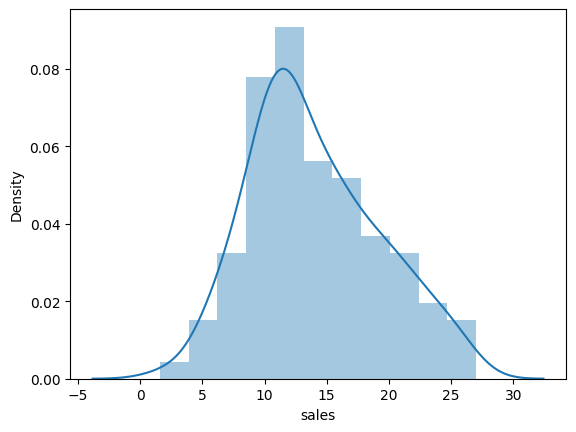

In [40]:
# See the distribution of the sales column  ---> how values are spread 
sns.distplot(df.sales)


## Sales is kinda normally distributed

C:\Users\SAIMON\AppData\Local\Temp\ipykernel_23820\575838971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.newspaper)


<Axes: xlabel='newspaper', ylabel='Density'>

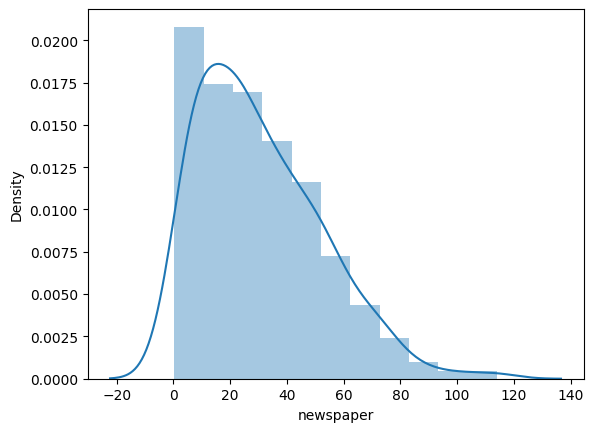

In [13]:
# See the distribution of the sales column  ---> how values are spread 
sns.distplot(df.newspaper)

## Newspaper ads are right skewed

C:\Users\SAIMON\AppData\Local\Temp\ipykernel_23820\928201292.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.radio)


<Axes: xlabel='radio', ylabel='Density'>

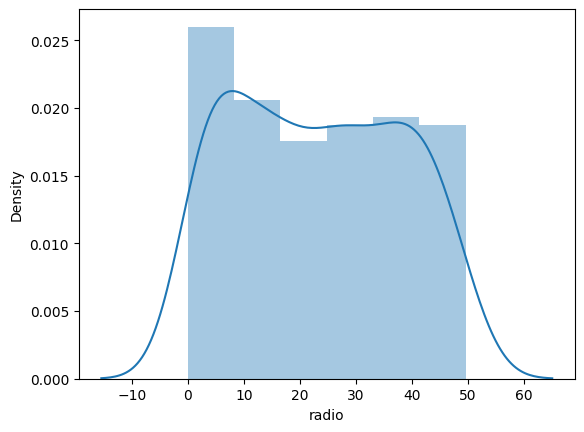

In [14]:
# See the distribution of the sales column  ---> how values are spread 
sns.distplot(df.radio)


## radio is kinda uniformly distributed

C:\Users\SAIMON\AppData\Local\Temp\ipykernel_23820\2497493560.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TV)


<Axes: xlabel='TV', ylabel='Density'>

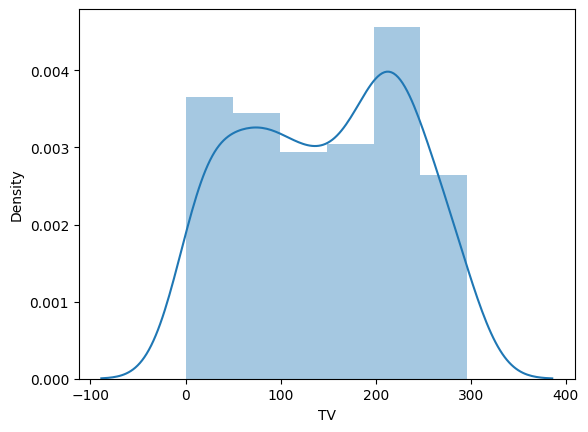

In [15]:
# See the distribution of the sales column  ---> how values are spread 
sns.distplot(df.TV)


## TV is also kinda bimodal distribution

# Chek the relationship between sales and all the other columns

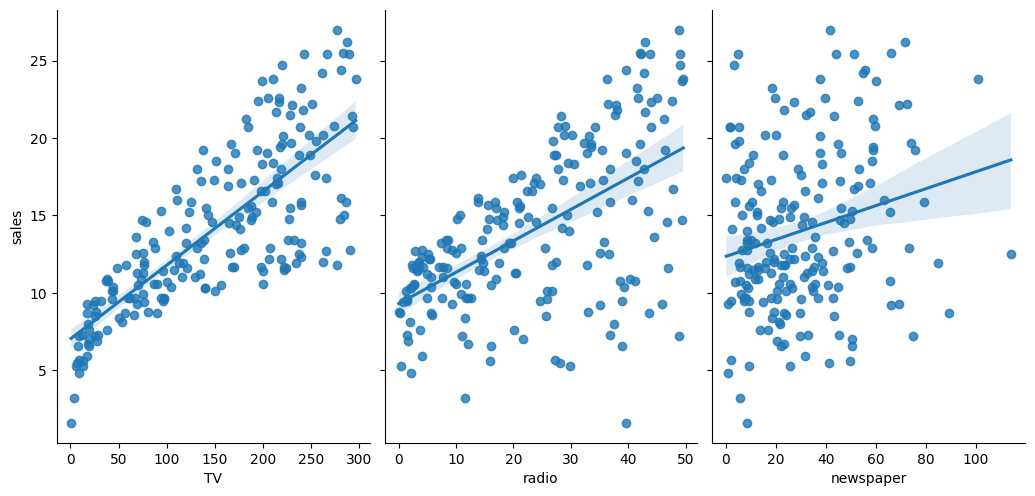

In [18]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars=["sales"], height=5, aspect=0.7, kind="reg")

In [19]:
## Here sales and TV ads have a linear relationship /// more the TV ads more the sales
df.TV.corr(df.sales)

np.float64(0.7822244248616061)

In [20]:
# Check all other columns corr with sales 
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [22]:
# Here TV ads have the highest correlation with sales /// 0.78
## Means if TV ads increase sales will also increase  /// strong relationship

# So we will use only TV and Radio ads to predict sales as it wil serve as  good predictor


### newspaper  ---> can be remove for simplicity


<Axes: >

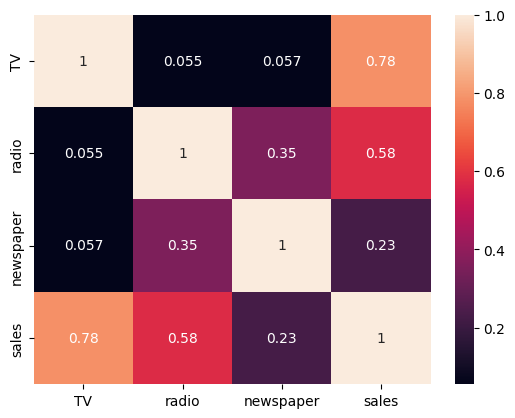

In [23]:
### Heatmap 
sns.heatmap(df.corr(), annot=True)

## Input --> TV and Radio
## Output --> sales

In [26]:
x = df[["TV", "radio"]]
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [27]:
y = df.sales
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [28]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
x_train

,TV,radio
159,131.7,18.4
62,239.3,15.5
166,17.9,37.6
45,175.1,22.5
23,228.3,16.9
...,...,...
73,129.4,5.7
144,96.2,14.8
118,125.7,36.9
189,18.7,12.1


## Simple linear model (y = b1x1 + b2x2 + b3x3 + ....... + b )

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Model coefficients


In [ ]:
print(lr.intercept_)  ## --> bias term
print(lr.coef_)       ## --> coefficients for TV and radio ads

2.9018044863017582
[0.04686571 0.18162258]


# Predictions

In [33]:
y_pred = lr.predict(x_test)
y_pred

array([ 6.71696055, 13.7253662 , 12.00209144,  9.68256432, 15.53542149,
       10.09818522, 13.83561802, 11.55380347, 19.48396536, 10.64486247,
       18.82995178,  7.64112467, 14.95399952, 16.44229454, 21.19554987,
       20.29487138, 17.50297226, 20.4343579 ,  6.6276429 , 11.64178077,
       10.71319359, 14.9204562 , 20.44415713, 14.50933057, 19.85044652,
       21.28963559, 13.94225546, 23.28206978,  8.34751864, 20.71740475,
       15.85847903, 15.20307696, 21.69252277, 18.40913207, 12.82860361,
        9.35069866,  5.3640782 , 12.02271438, 19.26556346,  8.1099828 ])

## Check accuracy, MAE

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



print("R2 score is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

R2 score is:  0.8985603563634559
Mean Absolute Error is:  1.2659038046641982
Mean Squared Error is:  2.5474512346534413
Root Mean Squared Error is:  1.5960736933655166


| Metric                          | Meaning                                                  | Ideal Value                               |
| ------------------------------- | -------------------------------------------------------- | ----------------------------------------- |
| **R² Score** (`r2_score`)       | How much variance in `y` is explained by `X`             | Close to **1.0**                          |
| **MAE** (`mean_absolute_error`) | Average absolute difference between predicted and actual | Closer to **0**                           |
| **MSE** (`mean_squared_error`)  | Average squared difference                               | Closer to **0**                           |
| **RMSE**                        | Square root of MSE                                       | Easier to interpret (same unit as target) |


### Check the difference graph of all kinds of distribution

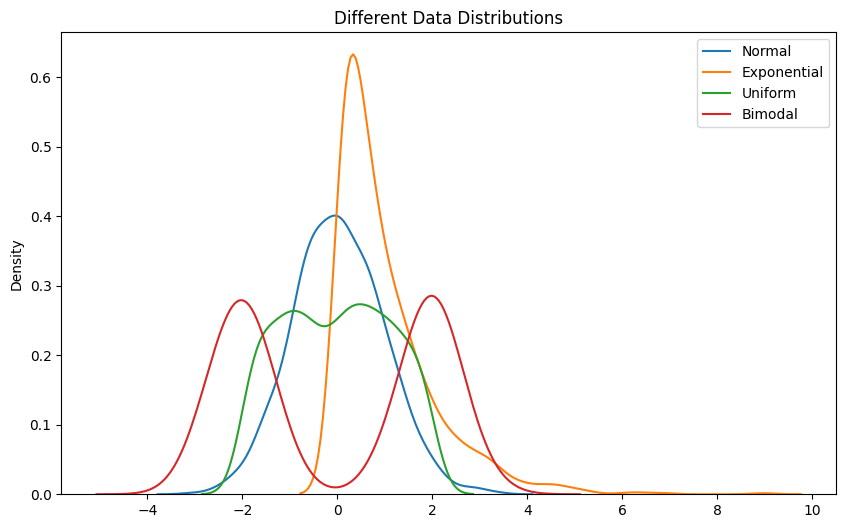

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Different distributions
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.exponential(1, 1000)
x3 = np.random.uniform(-2, 2, 1000)
x4 = np.concatenate([np.random.normal(-2, 0.5, 500), np.random.normal(2, 0.5, 500)])

plt.figure(figsize=(10, 6))
sns.kdeplot(x1, label='Normal')
sns.kdeplot(x2, label='Exponential')
sns.kdeplot(x3, label='Uniform')
sns.kdeplot(x4, label='Bimodal')
plt.legend()
plt.title("Different Data Distributions")
plt.show()
